In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# remove pandas column count limit
pd.set_option('display.max_columns', None)

In [55]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop','time']


In [56]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')


In [57]:
# get my data trip id == 4890
data[data['trip_id']==2370]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
241177,560490033,123,2021-10-01 09:11:27,7.293137,80.635765,0.00000,2021-10-01,09:11:27,POINT (184767.5840368192 232327.72943514792),NaN,2370.0,1,166,-0.415352,0.000000,0.000000,NaN,NaN,0.000000
241178,560490215,123,2021-10-01 09:11:33,7.293133,80.635833,2.69978,2021-10-01,09:11:33,POINT (184775.1252810224 232327.36224222518),NaN,2370.0,1,166,0.449963,0.016224,7.542102,0 days 00:00:06,0.865315,0.144219
241179,560491463,123,2021-10-01 09:11:48,7.293137,80.636227,5.39957,2021-10-01,09:11:48,POINT (184818.55166502894 232327.71411012457),NaN,2370.0,1,166,0.179986,0.012674,50.922804,0 days 00:00:15,-0.269977,-0.017998
241180,560491462,123,2021-10-01 09:12:03,7.293127,80.636852,7.55940,2021-10-01,09:12:03,POINT (184887.56079506013 232326.58761884997),NaN,2370.0,1,166,0.143989,0.058331,119.866348,0 days 00:00:15,-0.035997,-0.002400
241181,560491461,123,2021-10-01 09:12:10,7.293105,80.637165,8.09935,2021-10-01,09:12:10,POINT (184922.16418700397 232324.18871084476),NaN,2370.0,1,166,0.077136,0.088413,154.516247,0 days 00:00:07,-0.066853,-0.009550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,560581944,123,2021-10-01 10:00:35,7.297490,80.732497,1.07991,2021-10-01,10:00:35,POINT (195448.24314158212 232807.06548572614),NaN,2370.0,1,166,-0.031984,0.000039,14186.677147,0 days 00:09:34,0.076003,0.000132
241331,560582101,123,2021-10-01 10:00:39,7.297607,80.732742,3.77970,2021-10-01,10:00:39,POINT (195475.29563535625 232819.95702541425),NaN,2370.0,1,166,0.674948,0.268127,14216.648682,0 days 00:00:04,0.706931,0.176733
241332,560582104,123,2021-10-01 10:00:40,7.297657,80.732790,4.31966,2021-10-01,10:00:40,POINT (195480.64013873175 232825.48567381437),NaN,2370.0,1,166,0.539960,0.069841,14224.356314,0 days 00:00:01,-0.134988,-0.134988
241333,560583598,123,2021-10-01 10:00:55,7.298780,80.733387,11.87910,2021-10-01,10:00:55,POINT (195546.52353877638 232949.69701646626),NaN,2370.0,1,166,0.503963,0.672795,14365.534053,0 days 00:00:15,-0.035997,-0.002400


In [58]:
# set Nan in bus_stop to 0
data['bus_stop']=data['bus_stop'].fillna(0)
datain_one_direction=data[data['direction']==1]
datain_one_direction=datain_one_direction[selected_features]

In [59]:
# get the number of unique trip ids
unique_trip_ids = datain_one_direction['trip_id'].unique()
len(unique_trip_ids)

6793

In [60]:
# print a list of unique trip ids
trip_ids = datain_one_direction['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [61]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


In [62]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19
...,...,...,...,...,...,...,...,...,...,...
2054464,899261713,1719,15891.0,8.63931,0.269980,0.644606,16765.145617,-0.674945,0,18:12:12
2054465,899261608,1719,15891.0,10.79910,1.079895,1.726371,16776.916019,0.404957,0,18:12:14
2054466,899261607,1719,15891.0,10.79910,0.000000,1.702789,16788.793327,-0.539947,0,18:12:16
2054467,899261606,1719,15891.0,12.41900,0.809950,2.357947,16802.263247,0.404975,0,18:12:18


In [63]:
# read csv Data Sets\bus_stops_and_terminals_654.csv
bus_stops = pd.read_csv('../Data Sets/bus_stops_and_terminals_654.csv')
# get the list of stop ids where direction is 'Kandy-Digana'
bus_stops_kandy_digana = bus_stops[bus_stops['direction']=='Kandy-Digana']['stop_id'].unique()
bus_stops_kandy_digana

array(['BT01', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', 'BT02'], dtype=object)

In [64]:
# The code is iterating over unique values of the 'trip_id' column in the 'datain_one_direction' DataFrame. For each unique trip_id, it creates a new DataFrame 'df' containing only the rows with that trip_id.
# for x in datain_one_direction.trip_id.unique():
#     df = datain_one_direction[datain_one_direction['trip_id'] == x]
#     prev_stop = -1
#     current_stop = 0
#     segment = 1
    
#     for index, row in df.iterrows():
#         current_stop = row['bus_stop']
#         if current_stop != prev_stop:
#             if prev_stop == -1 and current_stop==0:
#                 segment=1
#                 datain_one_direction.loc[index, 'segment'] = segment
#             elif prev_stop == -1:
#                 datain_one_direction.loc[index, 'segment'] = 0
#                 if current_stop=='BT01':
#                     segment=1
#                 elif current_stop=='BT02':
#                     segment=16
#                 else:
#                     segment=(int(current_stop)-100)+1
#             elif current_stop!=0:   
#                 if current_stop=='BT01':
#                     segment=1
#                 elif current_stop=='BT02':
#                     segment=16
#                 else:
#                     segment=(int(current_stop)-100)+1
#                 datain_one_direction.loc[index, 'segment'] = segment
#             elif current_stop==0:
#                 datain_one_direction.loc[index, 'segment'] = segment
#         elif current_stop==0:
#                 datain_one_direction.loc[index, 'segment'] = segment
#         elif current_stop!=0:
#                 datain_one_direction.loc[index, 'segment'] = 0
#         prev_stop = current_stop
                
                
        

In [65]:
ayyas_df = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')

In [66]:
ayyas_df

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


In [67]:
ayyas_df[ayyas_df['trip_id']==2]

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
2877,2.0,116.0,1.0,1.0,2021-10-16,08:03:04,08:04:49,0 days 00:01:45,105.0,0.6261,5.0,8.00,0.0,1,0,3.0,102.0,102.0,102.0,87.0,102.0,102.0,102.0,102.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2878,2.0,116.0,1.0,2.0,2021-10-16,08:05:34,08:09:04,0 days 00:03:30,210.0,1.2808,5.0,8.00,0.0,1,0,3.0,249.0,249.0,249.0,222.0,249.0,105.0,249.0,249.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",45.0
2879,2.0,116.0,1.0,3.0,2021-10-16,08:09:04,08:16:15,0 days 00:07:11,431.0,2.1125,5.0,8.00,0.0,1,0,3.0,416.0,416.0,416.0,392.0,416.0,210.0,105.0,416.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2880,2.0,116.0,1.0,4.0,2021-10-16,08:16:15,08:20:36,0 days 00:04:21,261.0,1.5513,5.0,8.25,0.0,1,0,3.0,206.0,206.0,206.0,198.0,206.0,431.0,210.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2881,2.0,116.0,1.0,5.0,2021-10-16,08:20:36,08:22:21,0 days 00:01:45,105.0,0.8450,5.0,8.25,0.0,1,0,3.0,132.0,132.0,132.0,138.0,132.0,261.0,431.0,210.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2882,2.0,116.0,1.0,6.0,2021-10-16,08:22:21,08:26:57,0 days 00:04:36,276.0,1.3125,5.0,8.25,0.0,1,0,3.0,201.0,201.0,201.0,181.0,201.0,105.0,261.0,431.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2883,2.0,116.0,1.0,7.0,2021-10-16,08:27:57,08:28:57,0 days 00:01:00,60.0,0.3713,5.0,8.25,0.0,1,0,3.0,47.0,47.0,47.0,39.0,47.0,276.0,105.0,261.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",60.0
2884,2.0,116.0,1.0,8.0,2021-10-16,08:29:27,08:30:27,0 days 00:01:00,60.0,0.6245,5.0,8.25,0.0,1,0,3.0,78.0,78.0,78.0,60.0,78.0,60.0,276.0,105.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",30.0
2885,2.0,116.0,1.0,9.0,2021-10-16,08:30:27,08:31:12,0 days 00:00:45,45.0,0.2572,5.0,8.50,0.0,1,0,3.0,34.0,34.0,34.0,17.0,34.0,60.0,60.0,276.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",0.0
2886,2.0,116.0,1.0,10.0,2021-10-16,08:33:27,08:36:57,0 days 00:03:30,210.0,1.2349,5.0,8.50,0.0,1,0,3.0,164.0,164.0,164.0,124.0,164.0,45.0,60.0,60.0,8.0,16.0,10.0,25.0,0.194,2.1,"Rain, Overcast",135.0


In [68]:

datain_one_direction['segment'] = 0
for x in datain_one_direction.trip_id.unique():
    df = datain_one_direction[datain_one_direction['trip_id'] == x]
    ayyas_tid_df = ayyas_df[ayyas_df['trip_id'] == x]

    for index, row in df.iterrows():
        for index2, row2 in ayyas_tid_df.iterrows():
            # print(row)
            print_counter = 0
            # Check if 'start_time' and 'end_time' are not null (not missing values)
            if pd.notna(row2['start_time']) and pd.notna(row2['end_time']):
                if row2['start_time'] <= row['time'] and row['time'] <= row2['end_time']:
                    datain_one_direction.loc[index, 'segment'] = row2['segment']
                    break
                        


In [69]:


# print all rows of bus_trip_speed_and_other_features where trip id is 3462
# ignore the raw limitation of panda for this cell
# pd.set_option('display.max_rows', None)
datain_one_direction[datain_one_direction['trip_id']==2].head(25)


,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
5,574736663,116,2.0,8.63931,-0.035997,0.639311,343.141212,-0.026398,101,08:04:34,1
6,574736664,116,2.0,0.00000,-0.575954,0.000000,400.646939,-0.035997,101,08:04:49,1
7,574736665,116,2.0,0.00000,0.000000,0.000000,401.021945,0.038397,101,08:05:04,0
8,574736666,116,2.0,0.00000,0.000000,0.000000,401.021945,0.000000,101,08:05:19,0
9,574736667,116,2.0,6.47948,0.431965,0.333808,427.897272,0.028798,101,08:05:34,2


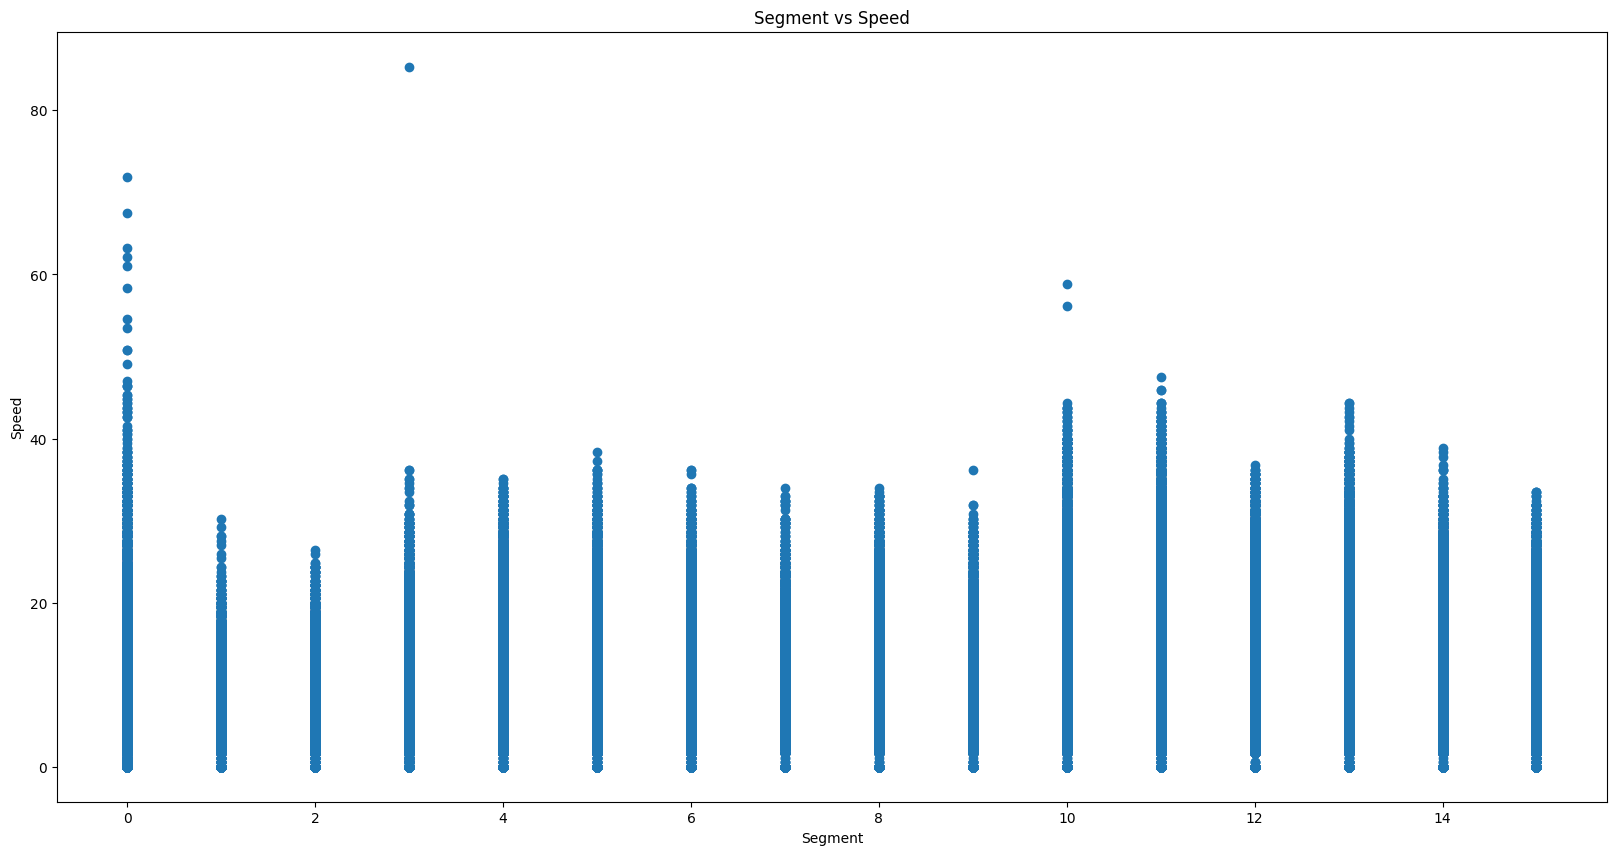

In [70]:
# draw a dot plot for segment vs speed
plt.figure(figsize=(20,10))
plt.scatter(datain_one_direction['segment'], datain_one_direction['speed'])
plt.xlabel('Segment')
plt.ylabel('Speed')
plt.title('Segment vs Speed')
plt.show()

In [71]:
# print the number of unique bus stops per each trip id in the data set
# datain_one_direction.groupby('trip_id')['bus_stop'].nunique()
# print the trip ids and the number of unique bus stops for the trip ids with the number of unique bus stops different from 16
datain_one_direction.groupby('trip_id')['bus_stop'].nunique().reset_index(name='count').query('count != 16')

,trip_id,count
31,64.0,15
39,80.0,15
103,213.0,15
158,332.0,15
216,454.0,13
...,...,...
6642,15571.0,14
6643,15572.0,14
6644,15574.0,15
6645,15576.0,15


In [72]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
...,...,...,...,...,...,...,...,...,...,...,...
2054464,899261713,1719,15891.0,8.63931,0.269980,0.644606,16765.145617,-0.674945,0,18:12:12,15
2054465,899261608,1719,15891.0,10.79910,1.079895,1.726371,16776.916019,0.404957,0,18:12:14,0
2054466,899261607,1719,15891.0,10.79910,0.000000,1.702789,16788.793327,-0.539947,0,18:12:16,0
2054467,899261606,1719,15891.0,12.41900,0.809950,2.357947,16802.263247,0.404975,0,18:12:18,0


In [73]:
df_for_segment_avg=datain_one_direction[datain_one_direction['segment']!=0]
# drop the columns that are not needed
df_for_segment_avg=df_for_segment_avg.drop(columns=['distance_from_start','bus_stop','id'])

df_for_busstop_avg=datain_one_direction[datain_one_direction['bus_stop']!=0]
# drop the columns that are not needed
df_for_busstop_avg=df_for_busstop_avg.drop(columns=['distance_from_start','segment','id'])

In [74]:
df_for_segment_avg.head(25)

,deviceid,trip_id,speed,acceleration,radial_acceleration,acceleration_der,time,segment
0,116,2.0,14.03890,0.323975,0.000000,0.000000,08:03:19,1
1,116,2.0,10.25920,-0.251980,1.278067,-0.038397,08:03:34,1
2,116,2.0,7.55940,-0.179987,0.722300,0.004800,08:03:49,1
3,116,2.0,3.77970,-0.251980,0.048332,-0.004800,08:04:04,1
4,116,2.0,9.17927,0.359971,1.052222,0.040797,08:04:19,1
5,116,2.0,8.63931,-0.035997,0.639311,-0.026398,08:04:34,1
6,116,2.0,0.00000,-0.575954,0.000000,-0.035997,08:04:49,1
9,116,2.0,6.47948,0.431965,0.333808,0.028798,08:05:34,2
10,116,2.0,9.17927,0.179986,0.546434,-0.016799,08:05:49,2
11,116,2.0,8.63931,-0.035997,0.096457,-0.014399,08:06:04,2


In [75]:
# get the unique values in segment column
datain_one_direction['segment'].unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

In [76]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


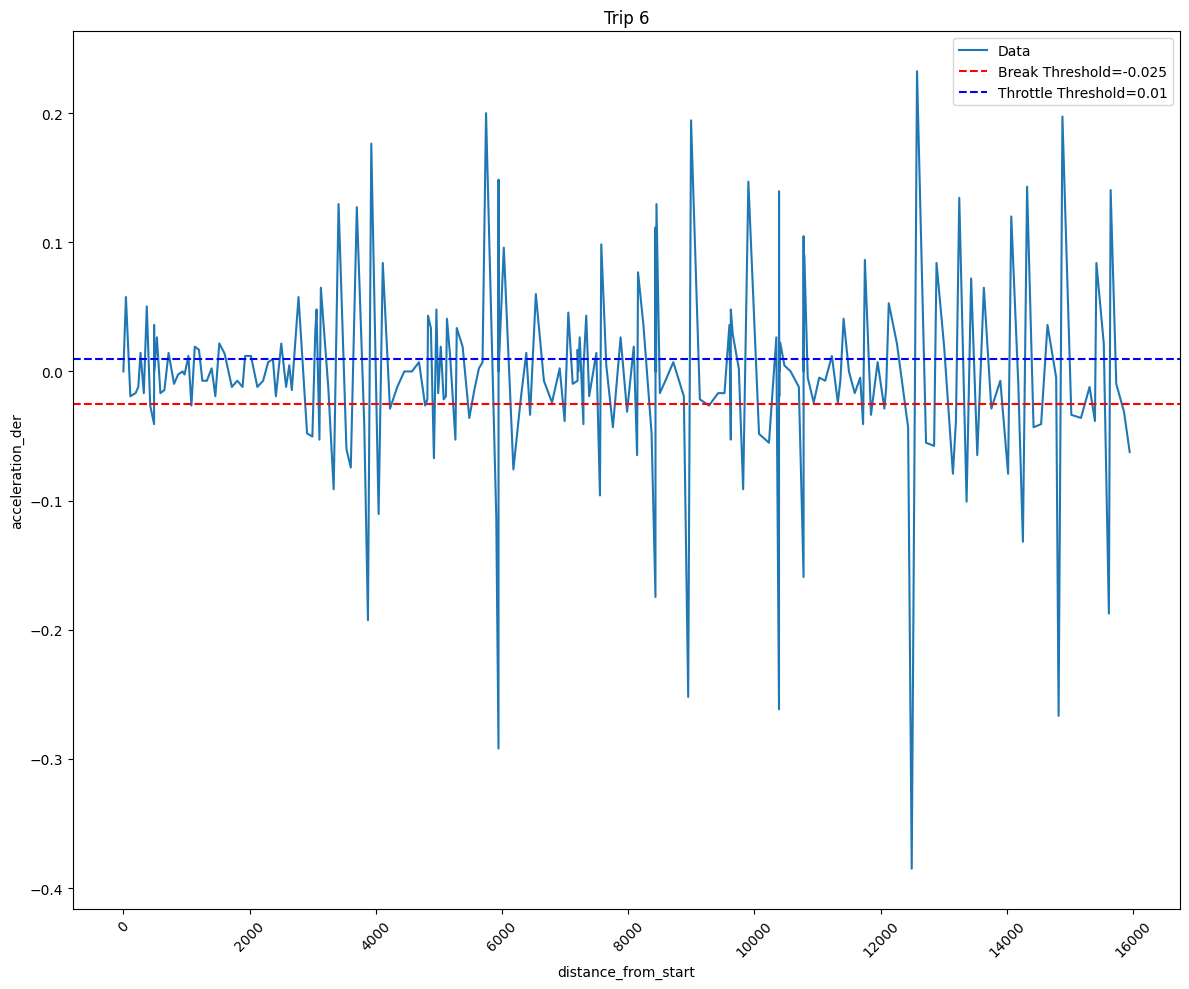

In [77]:
import matplotlib.pyplot as plt

columnx = 'distance_from_start'
columny = 'acceleration_der'
trip_id = 6

# Assuming 'data' is your DataFrame
df1 = data[(data['direction'] == 1) & (data['trip_id'] == 4)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the data
ax.plot(df1[f"{columnx}"], df1[f"{columny}"], label='Data')
ax.set_xlabel(f"{columnx}")
ax.set_ylabel(f"{columny}")
ax.set_title("Trip " + str(trip_id))
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_y = -0.025  # Change this to the desired y-value
ax.axhline(horizontal_line_y, color='red', linestyle='--', label=f'Break Threshold={horizontal_line_y}')

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_x = 0.01  # Change this to the desired y-value
ax.axhline(horizontal_line_x, color='blue', linestyle='--', label=f'Throttle Threshold={horizontal_line_x}')

# Add a legend to the plot
ax.legend()

# Adjust layout for better formatting
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
# take the mean of each feature grouped buy the deviceid and segment

# List of features you want to calculate the mean for
features_to_mean = ['deviceid','speed', 'acceleration', 'radial_acceleration']  # Replace with your actual feature names

# Group by 'deviceid' and 'segment', then calculate the mean for each feature
means = datain_one_direction.groupby(['trip_id', 'segment'])[features_to_mean].mean().reset_index()

# The 'means' DataFrame now contains the mean values for each feature, grouped by 'deviceid' and 'segment'
print(means)

        trip_id  segment  deviceid      speed  acceleration  \
0           2.0        0     116.0   1.524584      0.029645   
1           2.0        1     116.0   7.636540     -0.087422   
2           2.0        2     116.0   7.883371      0.026398   
3           2.0        3     116.0   8.713790      0.004566   
4           2.0        4     116.0  11.819059     -0.057995   
...         ...      ...       ...        ...           ...   
107141  15891.0       11    1719.0  18.699291     -0.152594   
107142  15891.0       12    1719.0  16.473428     -0.152041   
107143  15891.0       13    1719.0  17.021033     -0.189728   
107144  15891.0       14    1719.0  10.994308     -0.172396   
107145  15891.0       15    1719.0  13.151207     -0.080991   

        radial_acceleration  
0                  0.017093  
1                  0.534319  
2                  0.490645  
3                  0.612571  
4                  0.444268  
...                     ...  
107141             3.907671  
107

In [79]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,time,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,08:03:19,1
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,08:03:34,1
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,08:03:49,1
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,08:04:04,1
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,08:04:19,1
...,...,...,...,...,...,...,...,...,...,...,...
2054464,899261713,1719,15891.0,8.63931,0.269980,0.644606,16765.145617,-0.674945,0,18:12:12,15
2054465,899261608,1719,15891.0,10.79910,1.079895,1.726371,16776.916019,0.404957,0,18:12:14,0
2054466,899261607,1719,15891.0,10.79910,0.000000,1.702789,16788.793327,-0.539947,0,18:12:16,0
2054467,899261606,1719,15891.0,12.41900,0.809950,2.357947,16802.263247,0.404975,0,18:12:18,0


In [80]:
# Define the count_local_maxima_and_minima function
def count_local_maxima_and_minima(data):
    max_count = 0
    min_count = 0
    for i in range(1, len(data) - 1):
        if data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i - 1] and \
           data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i + 1] and \
           data['acceleration_der'].iloc[i] > 0.01:
            max_count += 1
        elif data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i - 1] and \
             data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i + 1] and \
             data['acceleration_der'].iloc[i] < -0.025:
            min_count += 1
    return max_count, min_count

# Group the data by 'segment' and 'trip_id' and apply the count_local_maxima_and_minima function to 'acceleration_der'
segment_maxima_minima_counts = datain_one_direction.groupby(['trip_id', 'deviceid', 'segment']).apply(count_local_maxima_and_minima)

# Convert the results into a DataFrame
segment_maxima_minima_counts = segment_maxima_minima_counts.apply(pd.Series)

# Reset the index to make 'trip_id', 'deviceid', and 'segment' regular columns
segment_maxima_minima_counts = segment_maxima_minima_counts.reset_index()

# Rename the columns for clarity
segment_maxima_minima_counts.columns = ['trip_id', 'deviceid', 'segment', 'throttle_count', 'break_count']

# The 'segment_maxima_minima_counts' DataFrame now contains the counts of local maxima and minima of 'acceleration_der' in each segment and trip_id
print(segment_maxima_minima_counts)


        trip_id  deviceid  segment  throttle_count  break_count
0           2.0       116        0               3            0
1           2.0       116        1               1            1
2           2.0       116        2               1            0
3           2.0       116        3               8            5
4           2.0       116        4               4            5
...         ...       ...      ...             ...          ...
107141  15891.0      1719       11              35           35
107142  15891.0      1719       12              33           35
107143  15891.0      1719       13              35           37
107144  15891.0      1719       14              24           26
107145  15891.0      1719       15              62           65

[107146 rows x 5 columns]


In [81]:
# get the number of unique trip ids
unique_trip_ids = segment_maxima_minima_counts['trip_id'].unique()
len(unique_trip_ids)

6793

In [82]:
# lef join means and segment_maxima_minima_counts on trip_id and segment
means_and_maxima_minima_counts = pd.merge(means, segment_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [83]:
# load the DataOut\bus_running_times_feature_added_all_moddedDF.csv csv file
bus_running_times_feature_added_all_moddedDF = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
bus_running_times_feature_added_all_moddedDF

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197627,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
197628,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
197629,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
197630,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


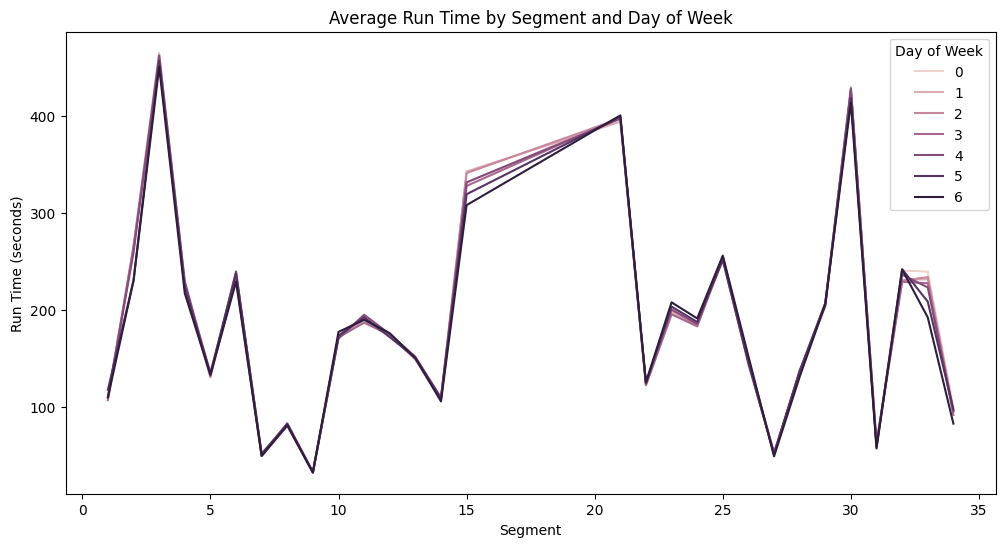

In [84]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_day_0f_week = bus_running_times_feature_added_all_moddedDF.groupby(['segment', 'day_of_week'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_day_0f_week
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_day_0f_week, x='segment', y='run_time_in_seconds', hue='day_of_week')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [85]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0,116.0,1.524584,0.029645,0.017093,116,3,0
1,2.0,1,116.0,7.636540,-0.087422,0.534319,116,1,1
2,2.0,2,116.0,7.883371,0.026398,0.490645,116,1,0
3,2.0,3,116.0,8.713790,0.004566,0.612571,116,8,5
4,2.0,4,116.0,11.819059,-0.057995,0.444268,116,4,5
...,...,...,...,...,...,...,...,...,...
107141,15891.0,11,1719.0,18.699291,-0.152594,3.907671,1719,35,35
107142,15891.0,12,1719.0,16.473428,-0.152041,2.910918,1719,33,35
107143,15891.0,13,1719.0,17.021033,-0.189728,3.823469,1719,35,37
107144,15891.0,14,1719.0,10.994308,-0.172396,2.093276,1719,24,26


In [86]:
means

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration
0,2.0,0,116.0,1.524584,0.029645,0.017093
1,2.0,1,116.0,7.636540,-0.087422,0.534319
2,2.0,2,116.0,7.883371,0.026398,0.490645
3,2.0,3,116.0,8.713790,0.004566,0.612571
4,2.0,4,116.0,11.819059,-0.057995,0.444268
...,...,...,...,...,...,...
107141,15891.0,11,1719.0,18.699291,-0.152594,3.907671
107142,15891.0,12,1719.0,16.473428,-0.152041,2.910918
107143,15891.0,13,1719.0,17.021033,-0.189728,3.823469
107144,15891.0,14,1719.0,10.994308,-0.172396,2.093276


In [87]:
# get the number of unique trip ids
unique_trip_ids = means['trip_id'].unique()
len(unique_trip_ids)

6793

In [88]:
# print a list of unique trip ids
trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [89]:
# save csv file
means_and_maxima_minima_counts.to_csv('../DataOut/means_and_maxima_minima_counts.csv',index=False)

In [90]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034419,898915939,1719,2022-02-25 16:47:53,7.291572,80.635452,2.15983,2022-02-25,16:47:53,POINT (184732.927692229 232154.67833579454),0,15890.0,2,1561,0.215983,0.714925,16242.694984,0 days 00:00:10,2.105833,0.210583
4034420,898916182,1719,2022-02-25 16:47:57,7.291587,80.635355,2.15983,2022-02-25,16:47:57,POINT (184722.26205350138 232156.3402929157),0,15890.0,2,1561,0.000000,0.003500,16253.479312,0 days 00:00:04,-0.215983,-0.053996
4034421,898917152,1719,2022-02-25 16:48:02,7.291597,80.635293,3.77970,2022-02-25,16:48:02,POINT (184715.44974995626 232157.44817551947),0,15890.0,2,1561,0.323974,1.320196,16260.374802,0 days 00:00:05,0.323974,0.064795
4034422,898917150,1719,2022-02-25 16:48:03,7.291605,80.635280,3.77970,2022-02-25,16:48:03,POINT (184713.9815042613 232158.37751184579),0,15890.0,2,1561,0.000000,0.128080,16262.113859,0 days 00:00:01,-0.323974,-0.323974


In [91]:
# get the last devicetime for each trip id from data datafraem
devicetime_for_each_trip_id = data.groupby(['trip_id'])['devicetime'].max().reset_index()
devicetime_for_each_trip_id

,trip_id,devicetime
0,1.0,2021-10-16 07:53:04
1,2.0,2021-10-16 08:53:48
2,3.0,2021-10-16 11:44:43
3,4.0,2021-10-16 13:18:33
4,5.0,2021-10-16 15:07:05
...,...,...
13569,15887.0,2022-02-25 10:34:59
13570,15888.0,2022-02-25 13:15:43
13571,15889.0,2022-02-25 14:38:03
13572,15890.0,2022-02-25 16:48:05


In [92]:
import pandas as pd

# Assuming 'devicetime' column is a string in the format 'YYYY-MM-DD HH:mm:ss'
# If it's not, adjust the format accordingly

# Convert 'devicetime' to a datetime data type
devicetime_for_each_trip_id['devicetime'] = pd.to_datetime(devicetime_for_each_trip_id['devicetime'])

# Create a new 'time_of_day' column based on the time component
devicetime_for_each_trip_id['time_of_day'] = pd.cut(
    devicetime_for_each_trip_id['devicetime'].dt.hour,
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [93]:
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
13569,15887.0,2022-02-25 10:34:59,day
13570,15888.0,2022-02-25 13:15:43,day
13571,15889.0,2022-02-25 14:38:03,day
13572,15890.0,2022-02-25 16:48:05,day


In [94]:
# create a dataframe with only trip ids with devicetime before '2022-11-01'
devicetime_for_each_trip_id = devicetime_for_each_trip_id[devicetime_for_each_trip_id['devicetime'] < '2022-11-01']
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
13569,15887.0,2022-02-25 10:34:59,day
13570,15888.0,2022-02-25 13:15:43,day
13571,15889.0,2022-02-25 14:38:03,day
13572,15890.0,2022-02-25 16:48:05,day


In [95]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0,116.0,1.524584,0.029645,0.017093,116,3,0
1,2.0,1,116.0,7.636540,-0.087422,0.534319,116,1,1
2,2.0,2,116.0,7.883371,0.026398,0.490645,116,1,0
3,2.0,3,116.0,8.713790,0.004566,0.612571,116,8,5
4,2.0,4,116.0,11.819059,-0.057995,0.444268,116,4,5
...,...,...,...,...,...,...,...,...,...
107141,15891.0,11,1719.0,18.699291,-0.152594,3.907671,1719,35,35
107142,15891.0,12,1719.0,16.473428,-0.152041,2.910918,1719,33,35
107143,15891.0,13,1719.0,17.021033,-0.189728,3.823469,1719,35,37
107144,15891.0,14,1719.0,10.994308,-0.172396,2.093276,1719,24,26


In [96]:
# add time_of_day column to means_and_maxima_minima_counts dataframe using trip_id
means_and_maxima_minima_counts_with_time_of_day = pd.merge(means_and_maxima_minima_counts, devicetime_for_each_trip_id, on=['trip_id'], how='left')

In [97]:
# drop devicetime and deviceid_y columns, and rename deviceid_x to deviceid
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.drop(columns=['devicetime', 'deviceid_y'])
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.rename(columns={'deviceid_x': 'deviceid'})


In [98]:
means_and_maxima_minima_counts_with_time_of_day

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration,throttle_count,break_count,time_of_day
0,2.0,0,116.0,1.524584,0.029645,0.017093,3,0,day
1,2.0,1,116.0,7.636540,-0.087422,0.534319,1,1,day
2,2.0,2,116.0,7.883371,0.026398,0.490645,1,0,day
3,2.0,3,116.0,8.713790,0.004566,0.612571,8,5,day
4,2.0,4,116.0,11.819059,-0.057995,0.444268,4,5,day
...,...,...,...,...,...,...,...,...,...
107141,15891.0,11,1719.0,18.699291,-0.152594,3.907671,35,35,day
107142,15891.0,12,1719.0,16.473428,-0.152041,2.910918,33,35,day
107143,15891.0,13,1719.0,17.021033,-0.189728,3.823469,35,37,day
107144,15891.0,14,1719.0,10.994308,-0.172396,2.093276,24,26,day


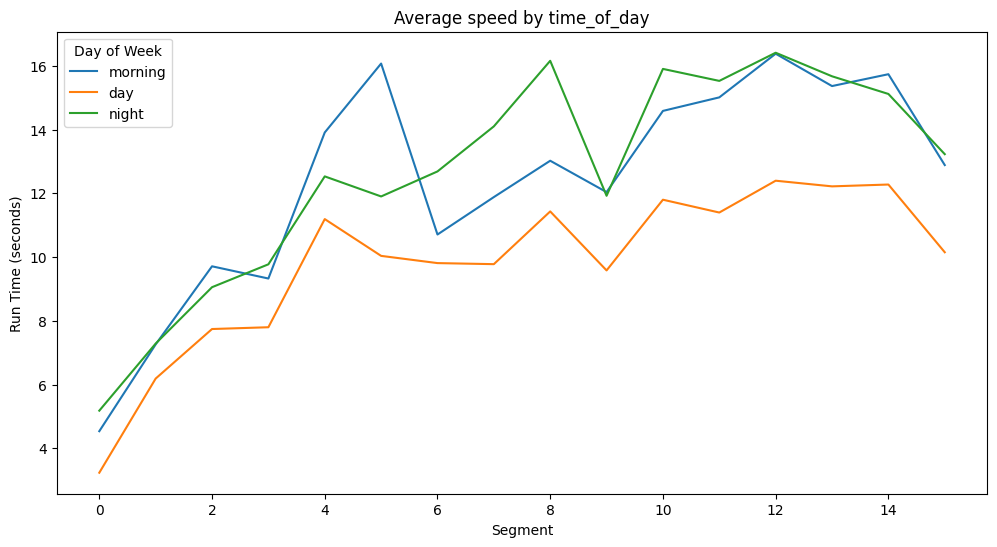

In [99]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = means_and_maxima_minima_counts_with_time_of_day.groupby(['segment', 'time_of_day'])['speed'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='speed', hue='time_of_day')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average speed by time_of_day')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [100]:
# left join time_of_day from means_and_maxima_minima_counts_with_time_of_day to bus_running_times_feature_added_all_moddedDF on trip_id and segment
bus_running_times_feature_added_all_moddedDF_tod = pd.merge(bus_running_times_feature_added_all_moddedDF, means_and_maxima_minima_counts_with_time_of_day[['trip_id', 'segment', 'time_of_day']], on=['trip_id', 'segment'], how='left')
bus_running_times_feature_added_all_moddedDF_tod.dropna(inplace=True)
bus_running_times_feature_added_all_moddedDF_tod

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),time_of_day_y
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0,day
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0,day
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168830,11205.0,513.0,1.0,11.0,2022-10-31,18:38:46,18:41:11,0:02:25,145.0,1.1000,0.0,18.50,0.0,0,1,42.0,144.0,174.0,144.0,179.0,242.0,191.0,34.0,84.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day
168831,11205.0,513.0,1.0,12.0,2022-10-31,18:41:11,18:43:37,0:02:26,146.0,1.3100,0.0,18.50,0.0,0,1,42.0,154.0,148.0,154.0,184.0,142.0,145.0,191.0,34.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,0.0,day
168832,11205.0,513.0,1.0,13.0,2022-10-31,18:43:44,18:46:13,0:02:29,149.0,1.1500,0.0,18.50,0.0,0,1,42.0,137.0,144.0,137.0,149.0,125.0,146.0,145.0,191.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,7.0,day
168833,11205.0,513.0,1.0,14.0,2022-10-31,18:46:28,18:47:48,0:01:20,80.0,0.8900,0.0,18.75,0.0,0,1,42.0,102.0,102.0,102.0,121.0,335.0,149.0,146.0,145.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0,day


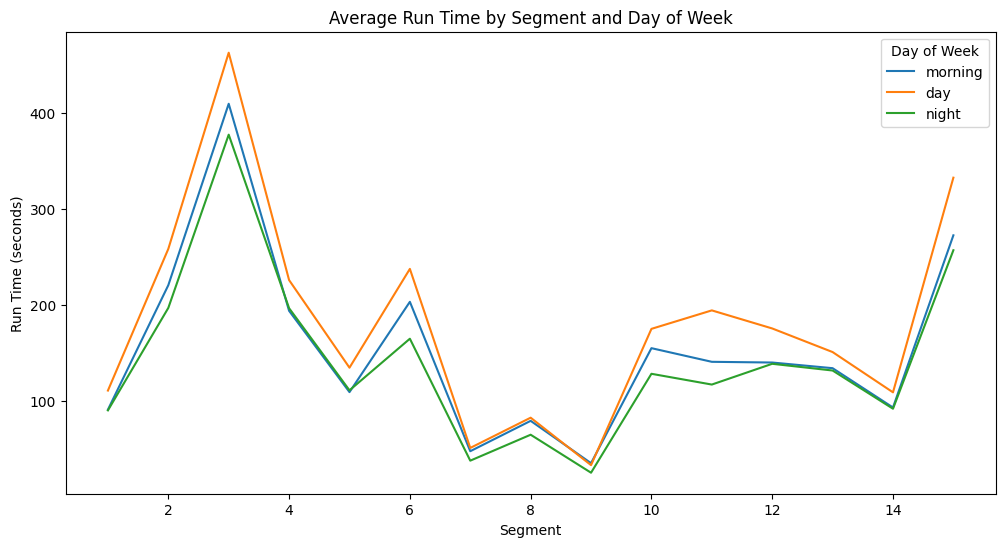

In [101]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = bus_running_times_feature_added_all_moddedDF_tod.groupby(['segment', 'time_of_day_y'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_time_of_day dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='run_time_in_seconds', hue='time_of_day_y')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()

In [102]:
# i want to take the average of speed, acceleration, radial_acceleration, acceleration_der, throttle_count, break_count for each deviceid and time_of_day per each segment
# List of features you want to calculate the mean for
features_to_mean = ['speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count']  # Replace with your actual feature names
avg_for_devID_time_of_day_and_segment = means_and_maxima_minima_counts_with_time_of_day.groupby(['deviceid', 'time_of_day', 'segment'])[features_to_mean].mean().reset_index()



In [103]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,NaN,NaN,NaN,NaN,NaN
1,116.0,morning,1,NaN,NaN,NaN,NaN,NaN
2,116.0,morning,2,NaN,NaN,NaN,NaN,NaN
3,116.0,morning,3,NaN,NaN,NaN,NaN,NaN
4,116.0,morning,4,NaN,NaN,NaN,NaN,NaN
5,116.0,morning,5,NaN,NaN,NaN,NaN,NaN
6,116.0,morning,6,NaN,NaN,NaN,NaN,NaN
7,116.0,morning,7,NaN,NaN,NaN,NaN,NaN
8,116.0,morning,8,NaN,NaN,NaN,NaN,NaN
9,116.0,morning,9,NaN,NaN,NaN,NaN,NaN


In [104]:
import pandas as pd
import numpy as np

# List of features (columns) to consider for filling NaN values
features_to_fill = avg_for_devID_time_of_day_and_segment.columns.difference(['deviceid', 'time_of_day', 'segment'])

# Calculate the mean without considering 'time_of_day' for the selected features
for feature in features_to_fill:
    avg_for_devID_time_of_day_and_segment[feature] = avg_for_devID_time_of_day_and_segment.groupby(['deviceid', 'segment'])[feature].transform(lambda x: x.fillna(x.mean()))


In [105]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0,3.396083,0.002191,0.175434,2.414347,0.944844
1,116.0,morning,1,6.617755,-0.022759,0.354919,1.444820,1.453245
2,116.0,morning,2,8.190476,0.021226,0.536539,3.344290,1.696848
3,116.0,morning,3,9.379045,-0.009781,0.627968,7.637994,6.356376
4,116.0,morning,4,13.073141,-0.028369,0.431310,4.018528,3.886830
5,116.0,morning,5,12.410127,-0.089716,0.328919,2.261449,2.222918
6,116.0,morning,6,11.531481,-0.046558,0.782298,3.208134,3.481537
7,116.0,morning,7,12.259334,0.102294,0.325217,0.392344,0.538278
8,116.0,morning,8,14.816338,-0.039122,0.994696,0.891148,0.930622
9,116.0,morning,9,12.256518,-0.193391,0.458531,0.169076,0.322602


In [106]:
# save csv file
avg_for_devID_time_of_day_and_segment.to_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv',index=False)